# 📊 Exploratory Data Analysis (EDA)
## APS Failure Dataset - Class Imbalance Analysis

**Dataset Link: [IDA2016 Challenge dataset](https://archive.ics.uci.edu/dataset/414/ida2016challenge)**

---

### 🎯 **Project Overview**
This notebook performs comprehensive exploratory data analysis on the IDA2016 Challenge dataset for APS (Air Pressure System) failure prediction in Scania trucks. The dataset presents a severe class imbalance challenge with a 1:59 ratio between positive and negative classes.

### 📋 **Notebook Contents**
1. **Data Loading and Basic Information**
2. **Class Distribution Analysis**
3. **Missing Values Analysis**
4. **Feature Distribution Analysis**
5. **Correlation Analysis**
6. **Statistical Summary**
7. **Data Quality Assessment**

---

In [12]:
# 📦 Import Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# 🎨 Set Style and Configuration

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# 📊 Configure Plotting Parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

print("✅ Libraries imported successfully!")
print(f"📅 Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Libraries imported successfully!
📅 Analysis Date: 2025-08-22 17:31:18


## 1️⃣ Data Loading and Basic Information

Let's start by loading the dataset and examining its basic structure.

In [4]:
# 📁 Load Dataset
print("🔄 Loading APS Failure Training Dataset...")
data = pd.read_csv('aps_failure_training_set.csv', na_values=['na'])

print(f"✅ Dataset loaded successfully!")
print(f"📏 Dataset Shape: {data.shape}")
print(f"💾 Memory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 📊 Display basic information
print("\n" + "="*50)
print("📋 DATASET INFORMATION")
print("="*50)
data.info()

🔄 Loading APS Failure Training Dataset...
✅ Dataset loaded successfully!
📏 Dataset Shape: (60000, 171)
💾 Memory Usage: 81.25 MB

📋 DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [5]:
# 👀 First Look at the Data
print("🔍 First 5 rows of the dataset:")
display(data.head())

print("\n🔍 Last 5 rows of the dataset:")
display(data.tail())

print("\n📊 Dataset columns:")
print(f"Total columns: {len(data.columns)}")
print(f"Feature columns: {len(data.columns) - 1} (excluding target 'class')")
print(f"Target column: 'class'")

🔍 First 5 rows of the dataset:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0



🔍 Last 5 rows of the dataset:


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0



📊 Dataset columns:
Total columns: 171
Feature columns: 170 (excluding target 'class')
Target column: 'class'


## 2️⃣ Class Distribution Analysis

### 🚨 **Critical Finding**: Severe Class Imbalance
The most important aspect of this dataset is the severe class imbalance. Let's analyze this in detail.

In [13]:
# 📊 Class Distribution Analysis
class_counts = data['class'].value_counts()
class_percentages = data['class'].value_counts(normalize=True) * 100

print("🎯 CLASS DISTRIBUTION ANALYSIS")
print("="*40)
print(f"Total samples: {len(data):,}")
print(f"\nClass Counts:")
for class_name, count in class_counts.items():
    percentage = class_percentages[class_name]
    print(f"  {class_name:>3}: {count:>6,} samples ({percentage:>5.2f}%)")

# 🔢 Calculate imbalance ratio
majority_class = class_counts.index[0]
minority_class = class_counts.index[1]
imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]

print(f"\n⚖️ IMBALANCE METRICS:")
print(f"  Majority class ('{majority_class}'): {class_counts[majority_class]:,} samples")
print(f"  Minority class ('{minority_class}'): {class_counts[minority_class]:,} samples")
print(f"  📈 Imbalance Ratio: {imbalance_ratio:.1f}:1")
print(f"  🚨 Severity: {'EXTREME' if imbalance_ratio > 50 else 'HIGH' if imbalance_ratio > 10 else 'MODERATE'}")

🎯 CLASS DISTRIBUTION ANALYSIS
Total samples: 60,000

Class Counts:
  neg: 59,000 samples (98.33%)
  pos:  1,000 samples ( 1.67%)

⚖️ IMBALANCE METRICS:
  Majority class ('neg'): 59,000 samples
  Minority class ('pos'): 1,000 samples
  📈 Imbalance Ratio: 59.0:1
  🚨 Severity: EXTREME


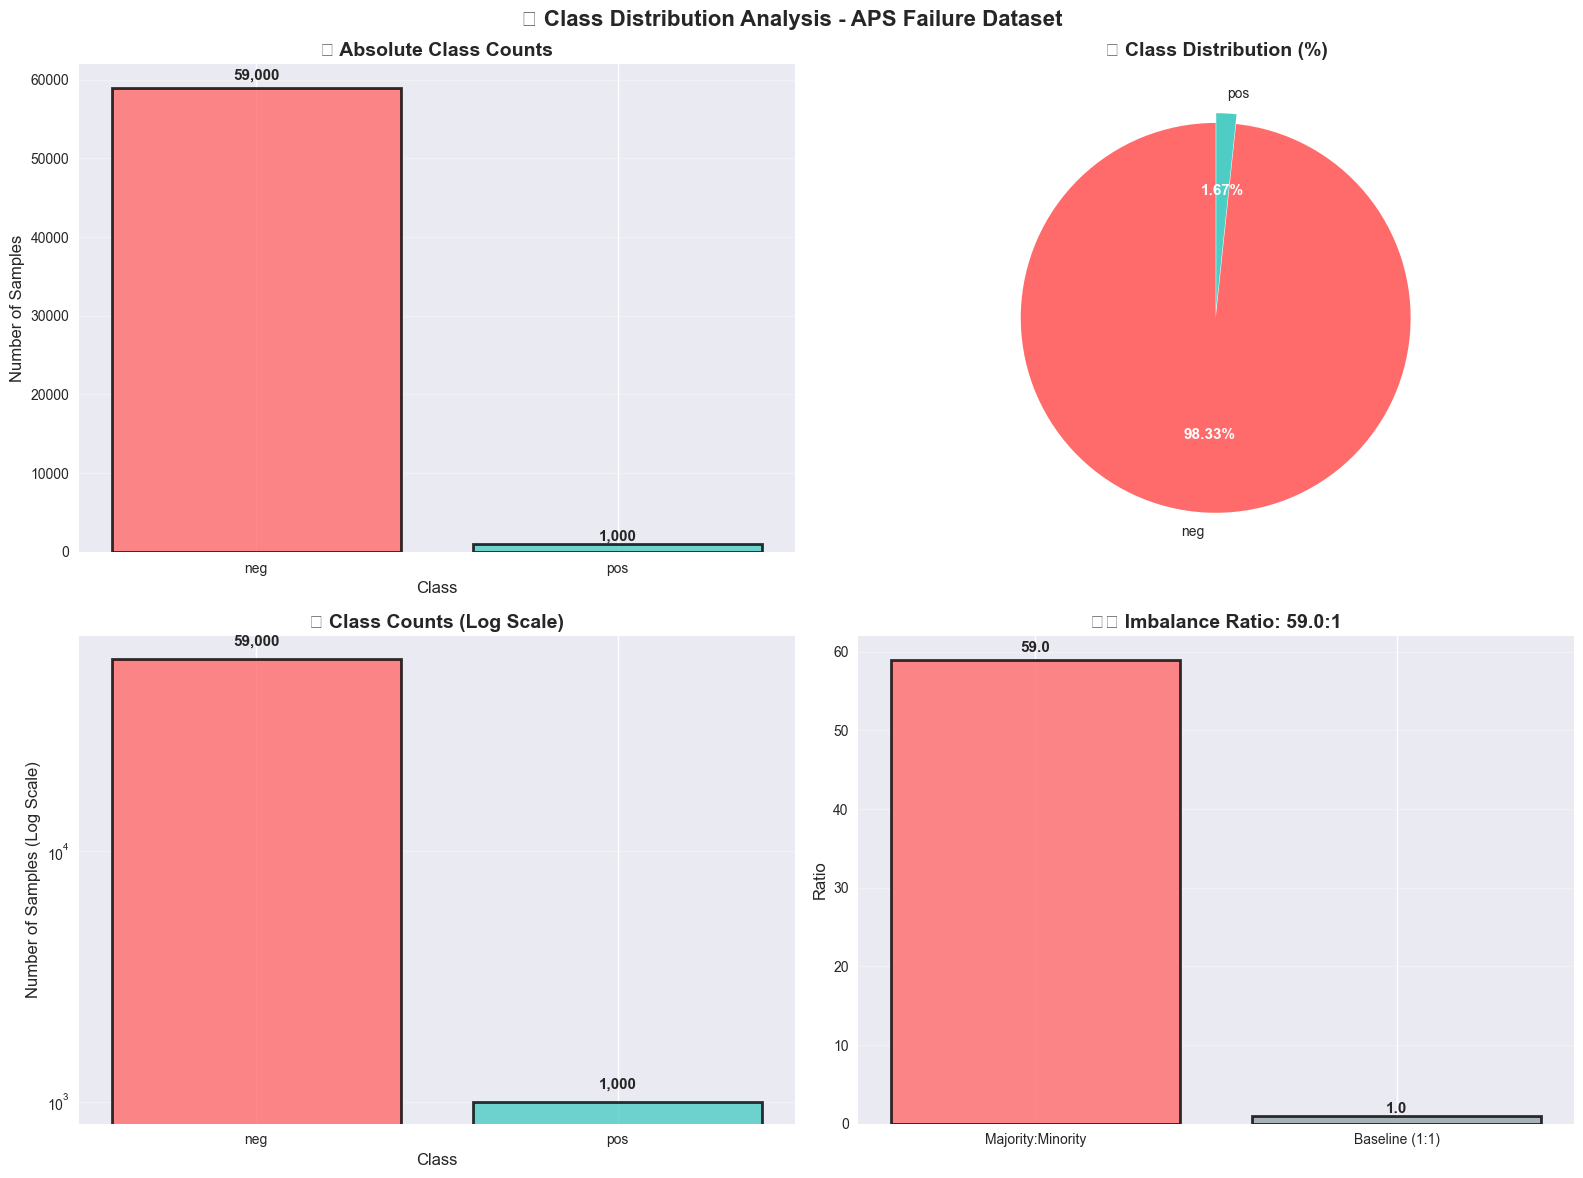

💾 Visualization saved to: artifacts/class_distribution_analysis.png


In [ ]:
# 📊 Visualize Class Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎯 Class Distribution Analysis - APS Failure Dataset', fontsize=16, fontweight='bold')

# 1. Bar Plot - Absolute Counts
ax1 = axes[0, 0]
bars = ax1.bar(class_counts.index, class_counts.values, 
               color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('📊 Absolute Class Counts', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 2. Pie Chart - Percentage Distribution
ax2 = axes[0, 1]
colors = ['#FF6B6B', '#4ECDC4']
wedges, texts, autotexts = ax2.pie(class_counts.values, labels=class_counts.index, 
                                   autopct='%1.2f%%', colors=colors, 
                                   startangle=90, explode=[0.05, 0])
ax2.set_title('🥧 Class Distribution (%)', fontsize=14, fontweight='bold')

# Enhance pie chart text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# 3. Log Scale Visualization
ax3 = axes[1, 0]
bars_log = ax3.bar(class_counts.index, class_counts.values, 
                   color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_yscale('log')
ax3.set_title('📈 Class Counts (Log Scale)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Class', fontsize=12)
ax3.set_ylabel('Number of Samples (Log Scale)', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

# Add value labels on log bars
for bar, count in zip(bars_log, class_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height * 1.1,
             f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 4. Imbalance Ratio Visualization
ax4 = axes[1, 1]
ratio_data = [imbalance_ratio, 1]
bars_ratio = ax4.bar(['Majority:Minority', 'Baseline (1:1)'], ratio_data, 
                     color=['#FF6B6B', '#95A5A6'], alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_title(f'⚖️ Imbalance Ratio: {imbalance_ratio:.1f}:1', fontsize=14, fontweight='bold')
ax4.set_ylabel('Ratio', fontsize=12)
ax4.grid(axis='y', alpha=0.3)

# Add ratio labels
for bar, ratio in zip(bars_ratio, ratio_data):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()


plt.savefig('artifacts/class_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Visualization saved to: artifacts/class_distribution_analysis.png")

## 3️⃣ Missing Values Analysis

Understanding missing data patterns is crucial for preprocessing decisions.

In [16]:
# 🔍 Missing Values Analysis
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

# Filter columns with missing values
missing_info_filtered = missing_info[missing_info['Missing_Count'] > 0]

print("🔍 MISSING VALUES ANALYSIS")
print("="*50)
print(f"Total columns: {len(data.columns)}")
print(f"Columns with missing values: {len(missing_info_filtered)}")
print(f"Columns without missing values: {len(data.columns) - len(missing_info_filtered)}")

if len(missing_info_filtered) > 0:
    print(f"\n📊 Top 10 columns with missing values:")
    display(missing_info_filtered.head(10))
else:
    print("\n✅ No missing values found in the dataset!")

🔍 MISSING VALUES ANALYSIS
Total columns: 171
Columns with missing values: 169
Columns without missing values: 2

📊 Top 10 columns with missing values:


,Column,Missing_Count,Missing_Percentage
79,br_000,49264,82.106667
78,bq_000,48722,81.203333
77,bp_000,47740,79.566667
76,bo_000,46333,77.221667
2,ab_000,46329,77.215000
113,cr_000,46329,77.215000
75,bn_000,44009,73.348333
74,bm_000,39549,65.915000
73,bl_000,27277,45.461667
72,bk_000,23034,38.390000


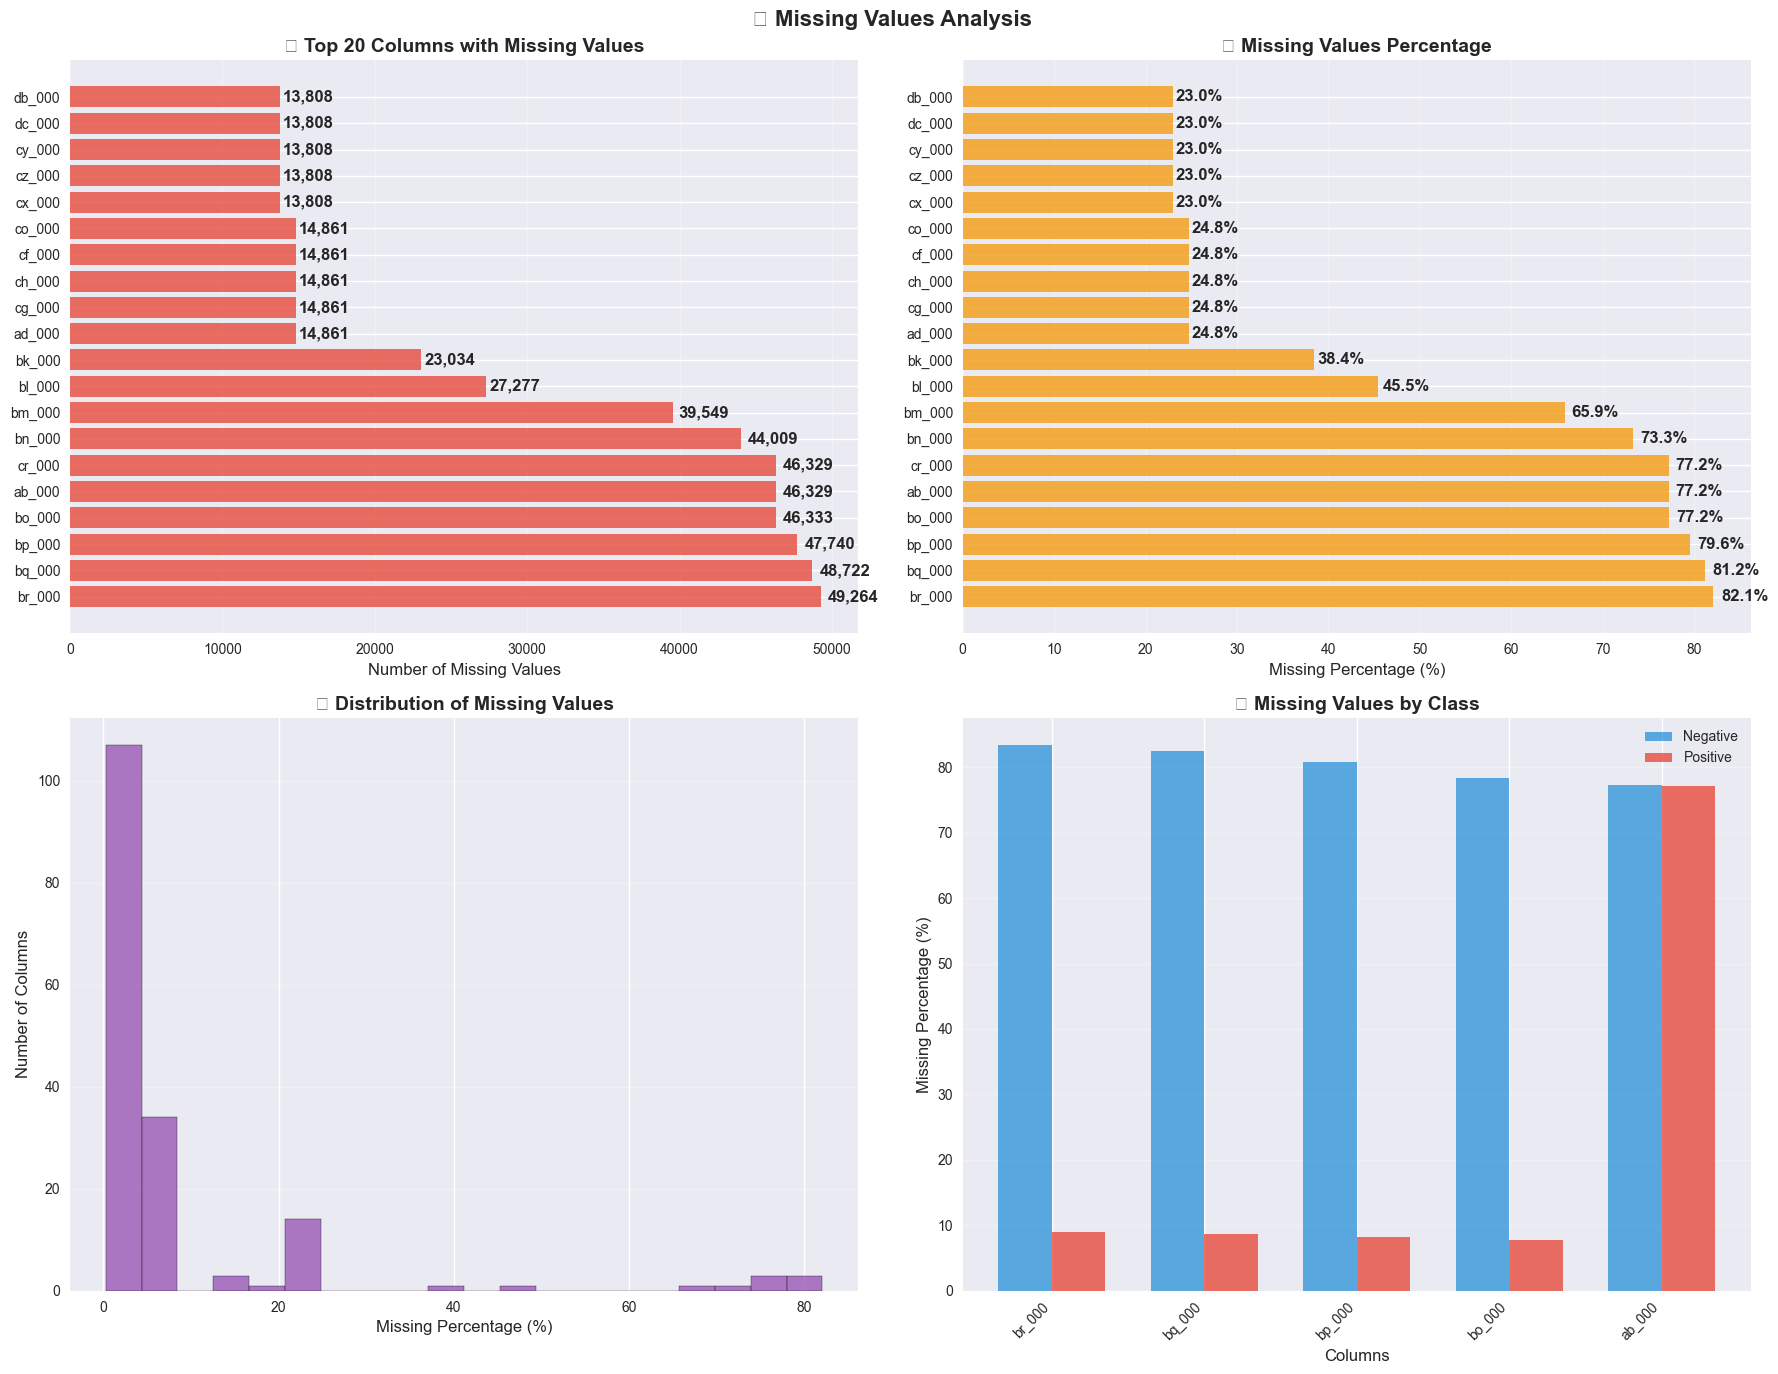

💾 Visualization saved to: artifacts/missing_values_analysis.png


In [17]:
# 📊 Visualize Missing Values Pattern
if len(missing_info_filtered) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('🔍 Missing Values Analysis', fontsize=16, fontweight='bold')
    
    # 1. Missing values count (top 20)
    ax1 = axes[0, 0]
    top_missing = missing_info_filtered.head(20)
    bars = ax1.barh(range(len(top_missing)), top_missing['Missing_Count'], 
                    color='#E74C3C', alpha=0.8)
    ax1.set_yticks(range(len(top_missing)))
    ax1.set_yticklabels(top_missing['Column'])
    ax1.set_xlabel('Number of Missing Values')
    ax1.set_title('📊 Top 20 Columns with Missing Values', fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}', ha='left', va='center', fontweight='bold')
    
    # 2. Missing values percentage
    ax2 = axes[0, 1]
    bars2 = ax2.barh(range(len(top_missing)), top_missing['Missing_Percentage'], 
                     color='#F39C12', alpha=0.8)
    ax2.set_yticks(range(len(top_missing)))
    ax2.set_yticklabels(top_missing['Column'])
    ax2.set_xlabel('Missing Percentage (%)')
    ax2.set_title('📈 Missing Values Percentage', fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, bar in enumerate(bars2):
        width = bar.get_width()
        ax2.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontweight='bold')
    
    # 3. Missing values distribution
    ax3 = axes[1, 0]
    missing_dist = missing_info_filtered['Missing_Percentage']
    ax3.hist(missing_dist, bins=20, color='#9B59B6', alpha=0.8, edgecolor='black')
    ax3.set_xlabel('Missing Percentage (%)')
    ax3.set_ylabel('Number of Columns')
    ax3.set_title('📊 Distribution of Missing Values', fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    
    # 4. Missing values by class
    ax4 = axes[1, 1]
    
    # Calculate missing values by class for a few key columns
    key_missing_cols = missing_info_filtered.head(5)['Column'].tolist()
    class_missing = []
    
    for col in key_missing_cols:
        for class_val in data['class'].unique():
            class_data = data[data['class'] == class_val]
            missing_count = class_data[col].isnull().sum()
            missing_pct = (missing_count / len(class_data)) * 100
            class_missing.append({
                'Column': col,
                'Class': class_val,
                'Missing_Pct': missing_pct
            })
    
    class_missing_df = pd.DataFrame(class_missing)
    
    # Create grouped bar plot
    x_pos = np.arange(len(key_missing_cols))
    width = 0.35
    
    neg_data = class_missing_df[class_missing_df['Class'] == 'neg']['Missing_Pct'].values
    pos_data = class_missing_df[class_missing_df['Class'] == 'pos']['Missing_Pct'].values
    
    bars1 = ax4.bar(x_pos - width/2, neg_data, width, label='Negative', 
                    color='#3498DB', alpha=0.8)
    bars2 = ax4.bar(x_pos + width/2, pos_data, width, label='Positive', 
                    color='#E74C3C', alpha=0.8)
    
    ax4.set_xlabel('Columns')
    ax4.set_ylabel('Missing Percentage (%)')
    ax4.set_title('📊 Missing Values by Class', fontweight='bold')
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(key_missing_cols, rotation=45, ha='right')
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('artifacts/missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("💾 Visualization saved to: artifacts/missing_values_analysis.png")
else:
    print("✅ No missing values to visualize!")

## 4️⃣ Feature Distribution Analysis

Let's analyze the distribution of key features and their relationship with the target class.

In [18]:
# 📊 Feature Distribution Analysis
# Select numeric columns (excluding target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'class' in numeric_cols:
    numeric_cols.remove('class')

print(f"📊 FEATURE DISTRIBUTION ANALYSIS")
print(f"Total numeric features: {len(numeric_cols)}")

# Analyze key statistical measures
feature_stats = data[numeric_cols].describe()
print("\n📈 Statistical Summary (Top 10 features):")
display(feature_stats.iloc[:, :10].round(2))

📊 FEATURE DISTRIBUTION ANALYSIS
Total numeric features: 170

📈 Statistical Summary (Top 10 features):


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003
count,60000.00,13671.00,5.666500e+04,4.513900e+04,57500.00,57500.00,59329.00,59329.00,59329.00,59329.00
mean,59336.50,0.71,3.560143e+08,1.906206e+05,6.82,11.01,221.64,975.72,8606.01,88591.28
std,145430.06,3.48,7.948749e+08,4.040441e+07,161.54,209.79,20478.46,34200.53,150322.03,761731.19
min,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00
25%,834.00,0.00,1.600000e+01,2.400000e+01,0.00,0.00,0.00,0.00,0.00,0.00
50%,30776.00,0.00,1.520000e+02,1.260000e+02,0.00,0.00,0.00,0.00,0.00,0.00
75%,48668.00,0.00,9.640000e+02,4.300000e+02,0.00,0.00,0.00,0.00,0.00,0.00
max,2746564.00,204.00,2.130707e+09,8.584298e+09,21050.00,20070.00,3376892.00,4109372.00,10552856.00,63402074.00


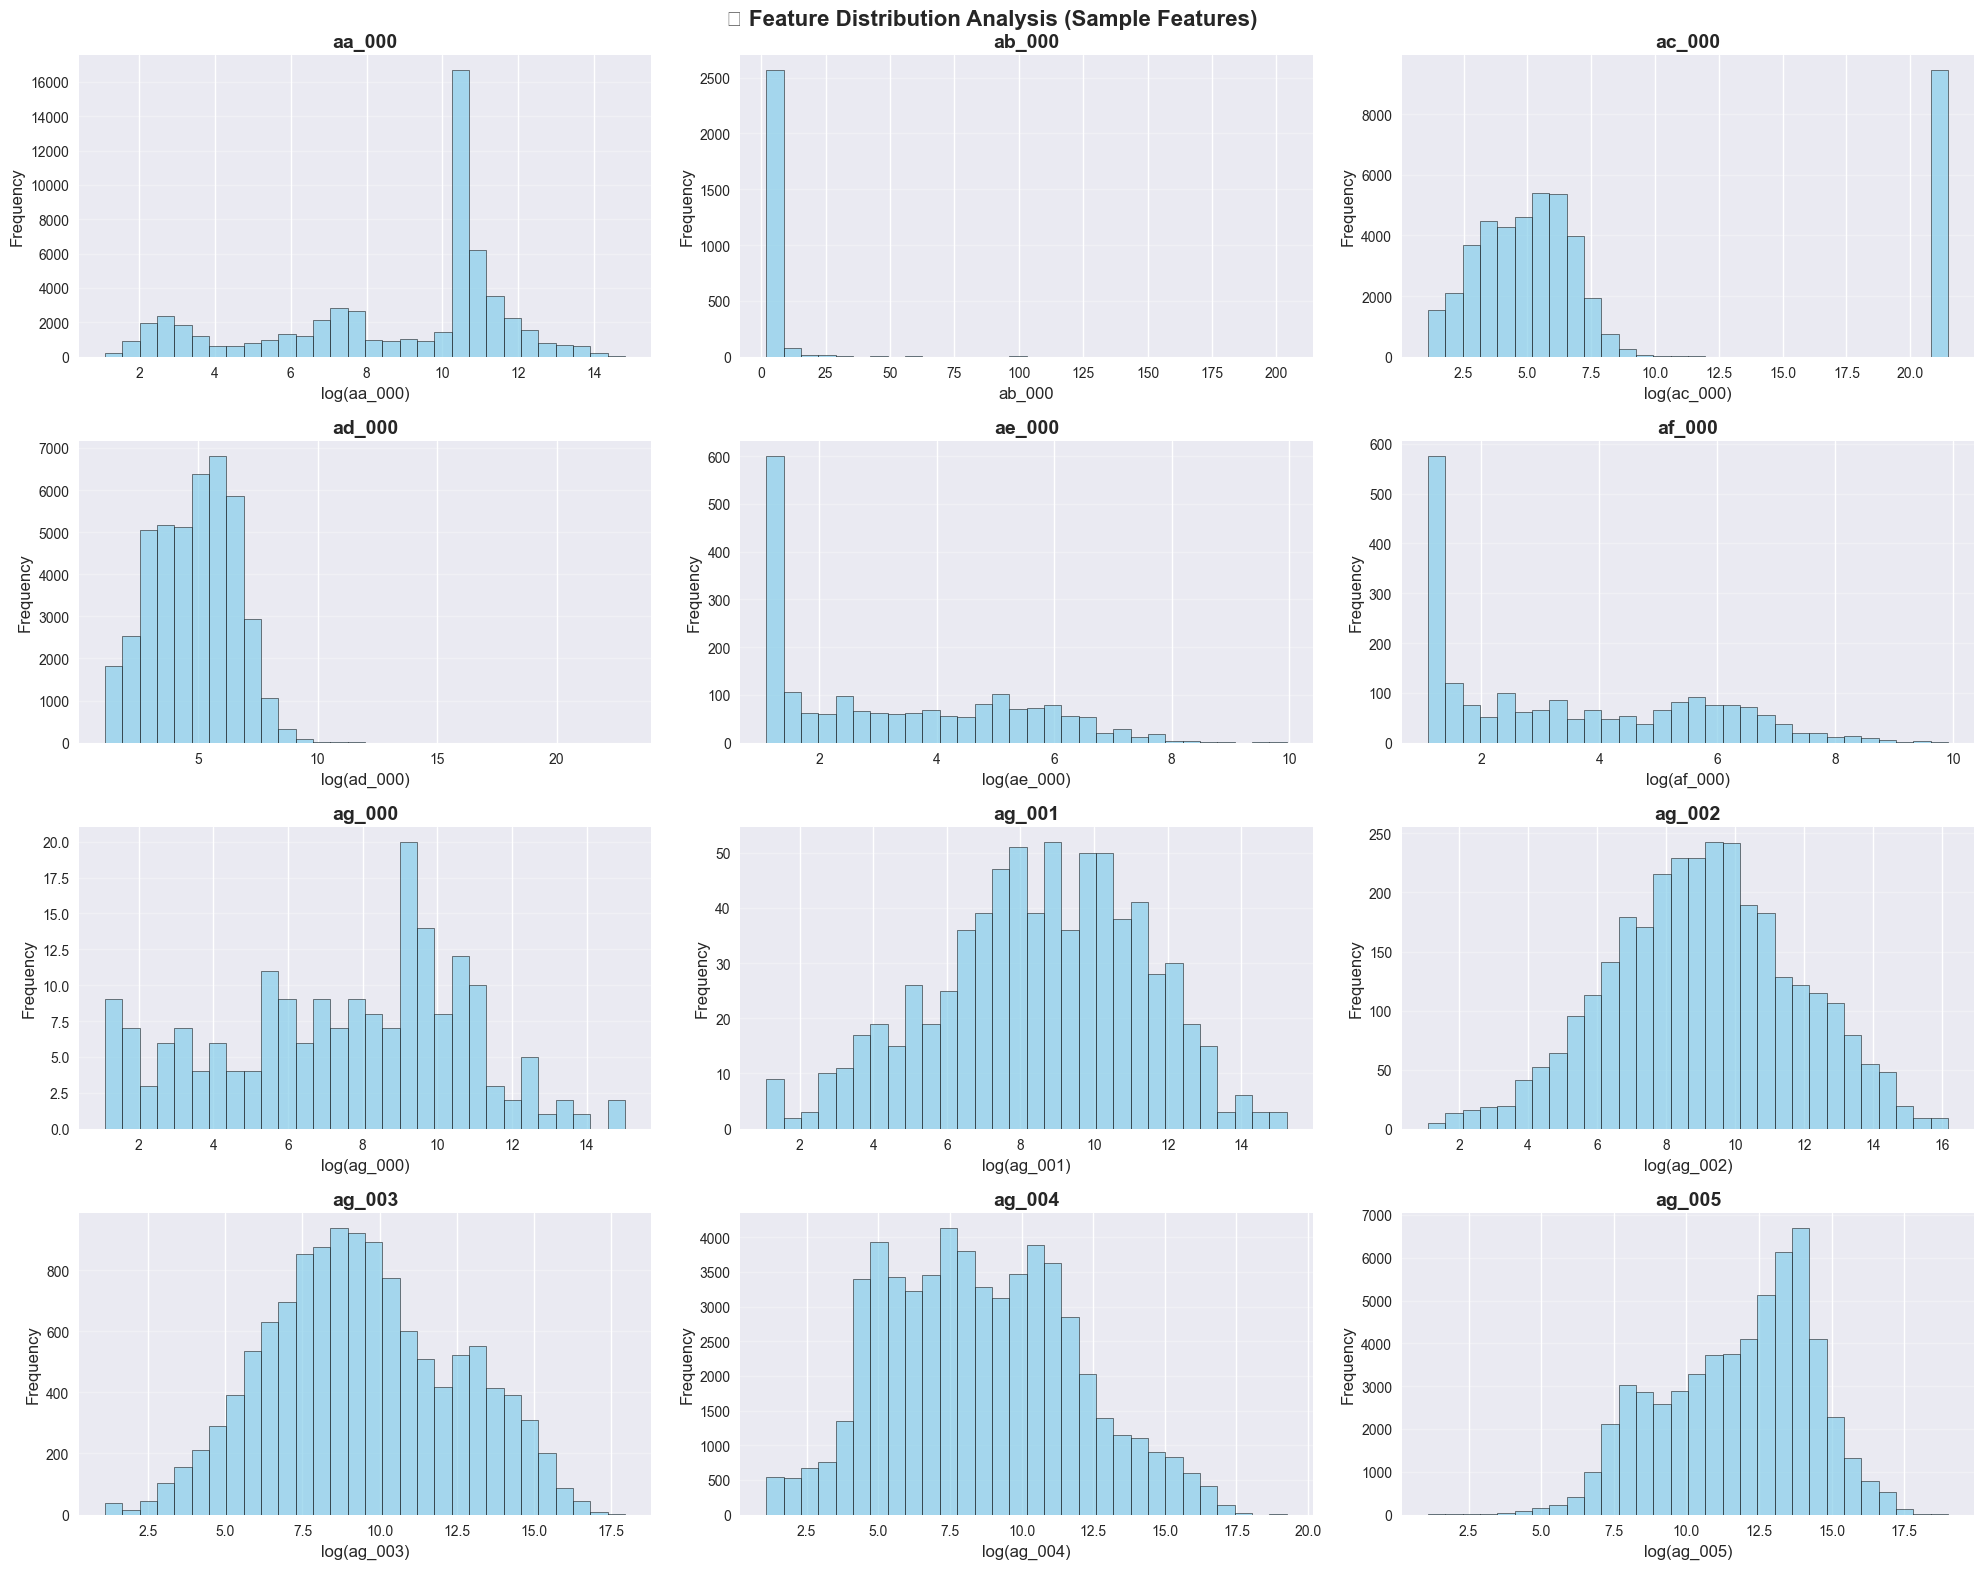

💾 Visualization saved to: artifacts/feature_distributions.png


In [19]:
# 📊 Visualize Feature Distributions
# Select first 12 features for visualization
sample_features = numeric_cols[:12]

fig, axes = plt.subplots(4, 3, figsize=(20, 16))
fig.suptitle('📊 Feature Distribution Analysis (Sample Features)', fontsize=16, fontweight='bold')

for i, feature in enumerate(sample_features):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    # Remove zero values for better visualization
    feature_data = data[feature].dropna()
    non_zero_data = feature_data[feature_data != 0]
    
    if len(non_zero_data) > 0:
        # Use log scale if data has high variance
        if non_zero_data.std() > non_zero_data.mean() * 2:
            ax.hist(np.log1p(non_zero_data), bins=30, color='skyblue', 
                   alpha=0.7, edgecolor='black', linewidth=0.5)
            ax.set_xlabel(f'log({feature})')
        else:
            ax.hist(non_zero_data, bins=30, color='skyblue', 
                   alpha=0.7, edgecolor='black', linewidth=0.5)
            ax.set_xlabel(feature)
    else:
        ax.text(0.5, 0.5, 'No non-zero data', ha='center', va='center', 
               transform=ax.transAxes, fontsize=12)
    
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Visualization saved to: artifacts/feature_distributions.png")

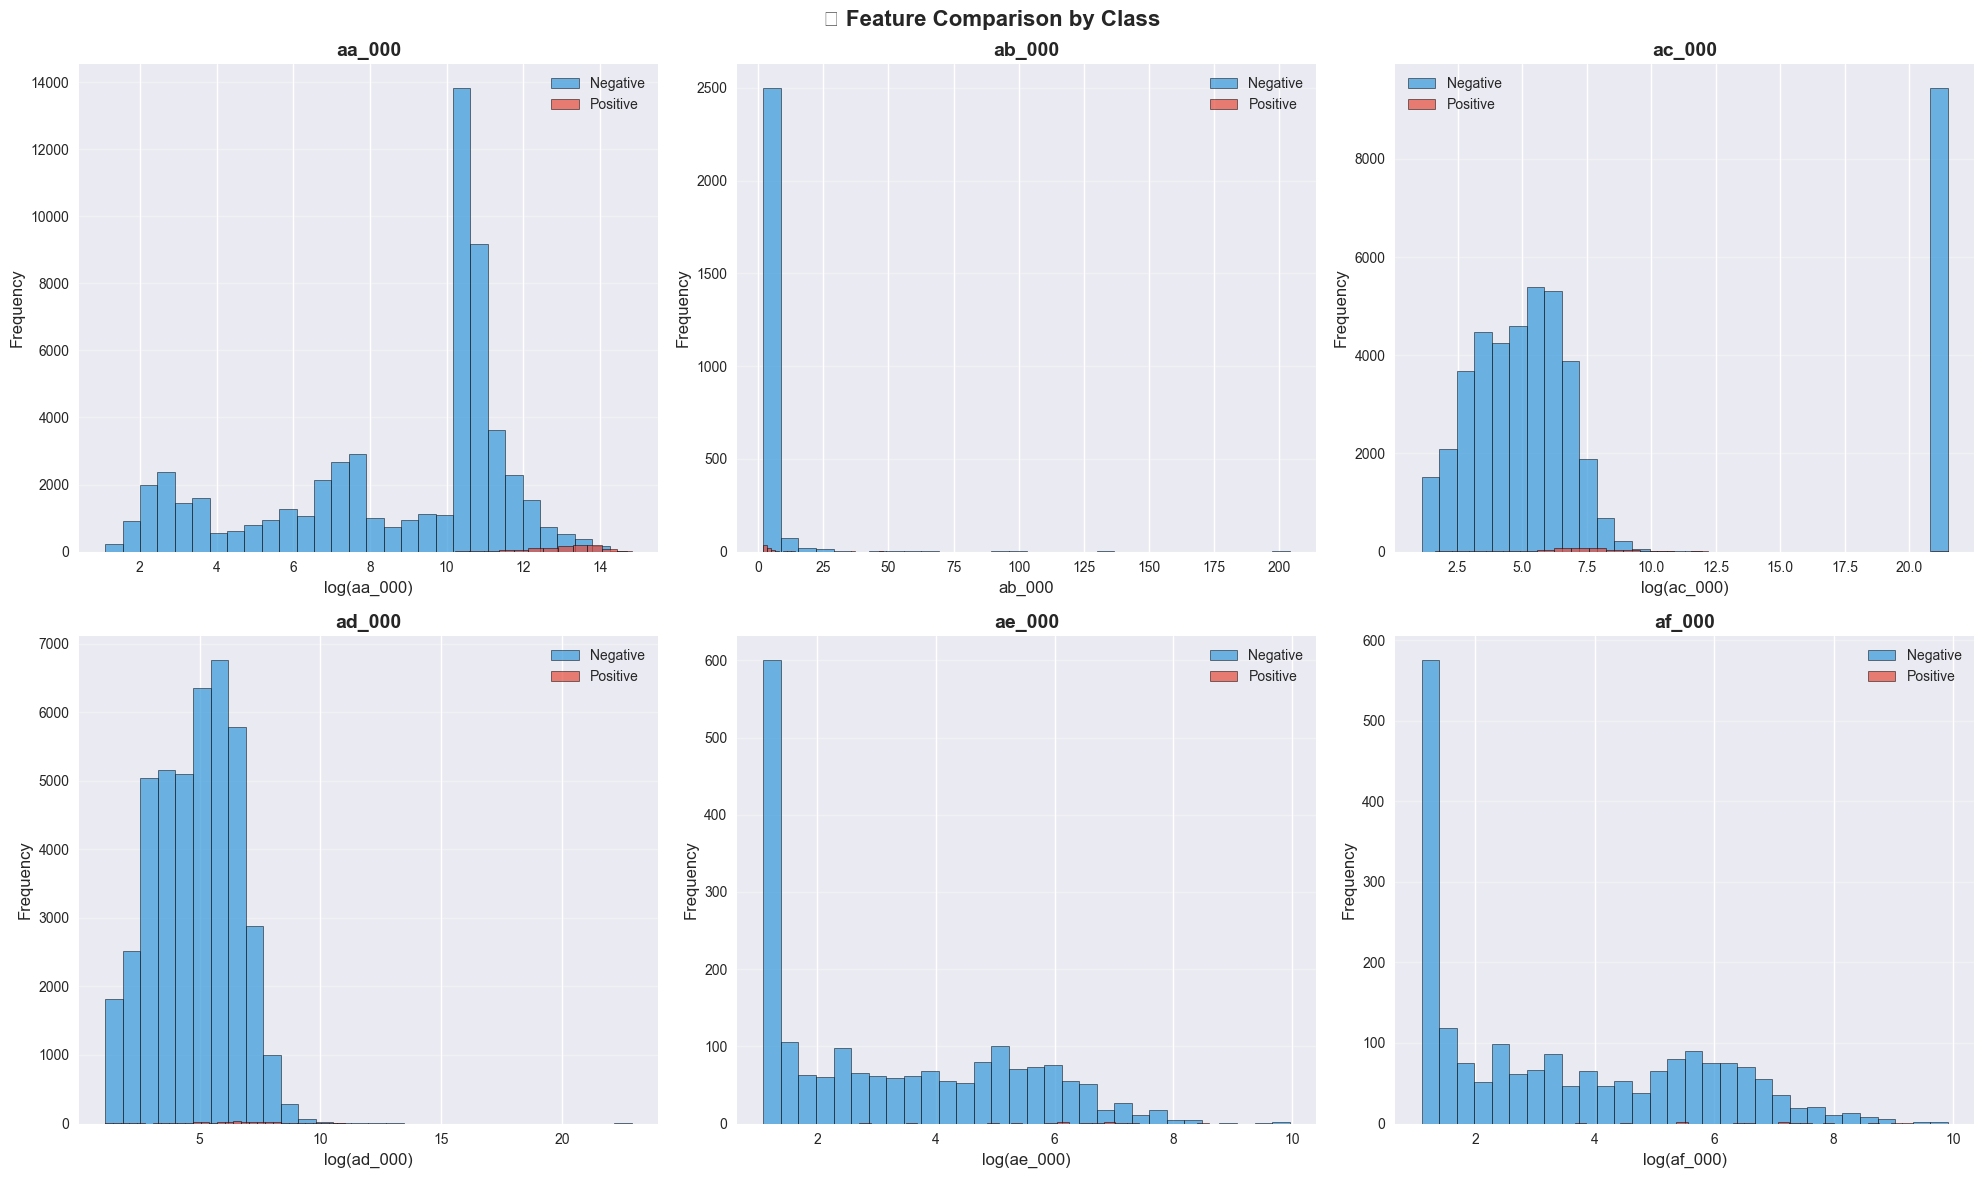

💾 Visualization saved to: artifacts/feature_comparison_by_class.png


In [23]:
# 📊 Feature Comparison by Class
# Select a few key features for class comparison
key_features = numeric_cols[:6]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🎯 Feature Comparison by Class', fontsize=16, fontweight='bold')

for i, feature in enumerate(key_features):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    # Separate data by class
    neg_data = data[data['class'] == 'neg'][feature].dropna()
    pos_data = data[data['class'] == 'pos'][feature].dropna()
    
    # Remove zeros for better visualization
    neg_data_nz = neg_data[neg_data != 0]
    pos_data_nz = pos_data[pos_data != 0]
    
    if len(neg_data_nz) > 0 and len(pos_data_nz) > 0:
        # Use log scale for high variance data
        if neg_data_nz.std() > neg_data_nz.mean() * 2:
            ax.hist(np.log1p(neg_data_nz), bins=30, alpha=0.7, 
                   label='Negative', color='#3498DB', edgecolor='black', linewidth=0.5)
            ax.hist(np.log1p(pos_data_nz), bins=30, alpha=0.7, 
                   label='Positive', color='#E74C3C', edgecolor='black', linewidth=0.5)
            ax.set_xlabel(f'log({feature})')
        else:
            ax.hist(neg_data_nz, bins=30, alpha=0.7, 
                   label='Negative', color='#3498DB', edgecolor='black', linewidth=0.5)
            ax.hist(pos_data_nz, bins=30, alpha=0.7, 
                   label='Positive', color='#E74C3C', edgecolor='black', linewidth=0.5)
            ax.set_xlabel(feature)
    
    ax.set_ylabel('Frequency')
    ax.set_title(f'{feature}', fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/feature_comparison_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Visualization saved to: artifacts/feature_comparison_by_class.png")

## 5️⃣ Correlation Analysis

Understanding feature correlations helps identify redundant features and feature relationships.

In [24]:
# 🔗 Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("="*40)

# Calculate correlation matrix for a subset of features (first 20)
sample_features_corr = numeric_cols[:20]
corr_data = data[sample_features_corr].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_data.columns)):
    for j in range(i+1, len(corr_data.columns)):
        corr_val = corr_data.iloc[i, j]
        if abs(corr_val) > 0.8:  # High correlation threshold
            high_corr_pairs.append({
                'Feature1': corr_data.columns[i],
                'Feature2': corr_data.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    print(f"\n🔗 Highly correlated feature pairs (|r| > 0.8):")
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("\n✅ No highly correlated feature pairs found (|r| > 0.8)")

print(f"\n📊 Correlation matrix shape: {corr_data.shape}")

🔗 CORRELATION ANALYSIS

🔗 Highly correlated feature pairs (|r| > 0.8):


,Feature1,Feature2,Correlation
4,aj_000,ak_000,0.930056
0,aa_000,ah_000,0.908103
2,ag_003,ag_004,0.873726
3,ag_006,ag_007,0.856696
1,ae_000,af_000,0.823108



📊 Correlation matrix shape: (20, 20)


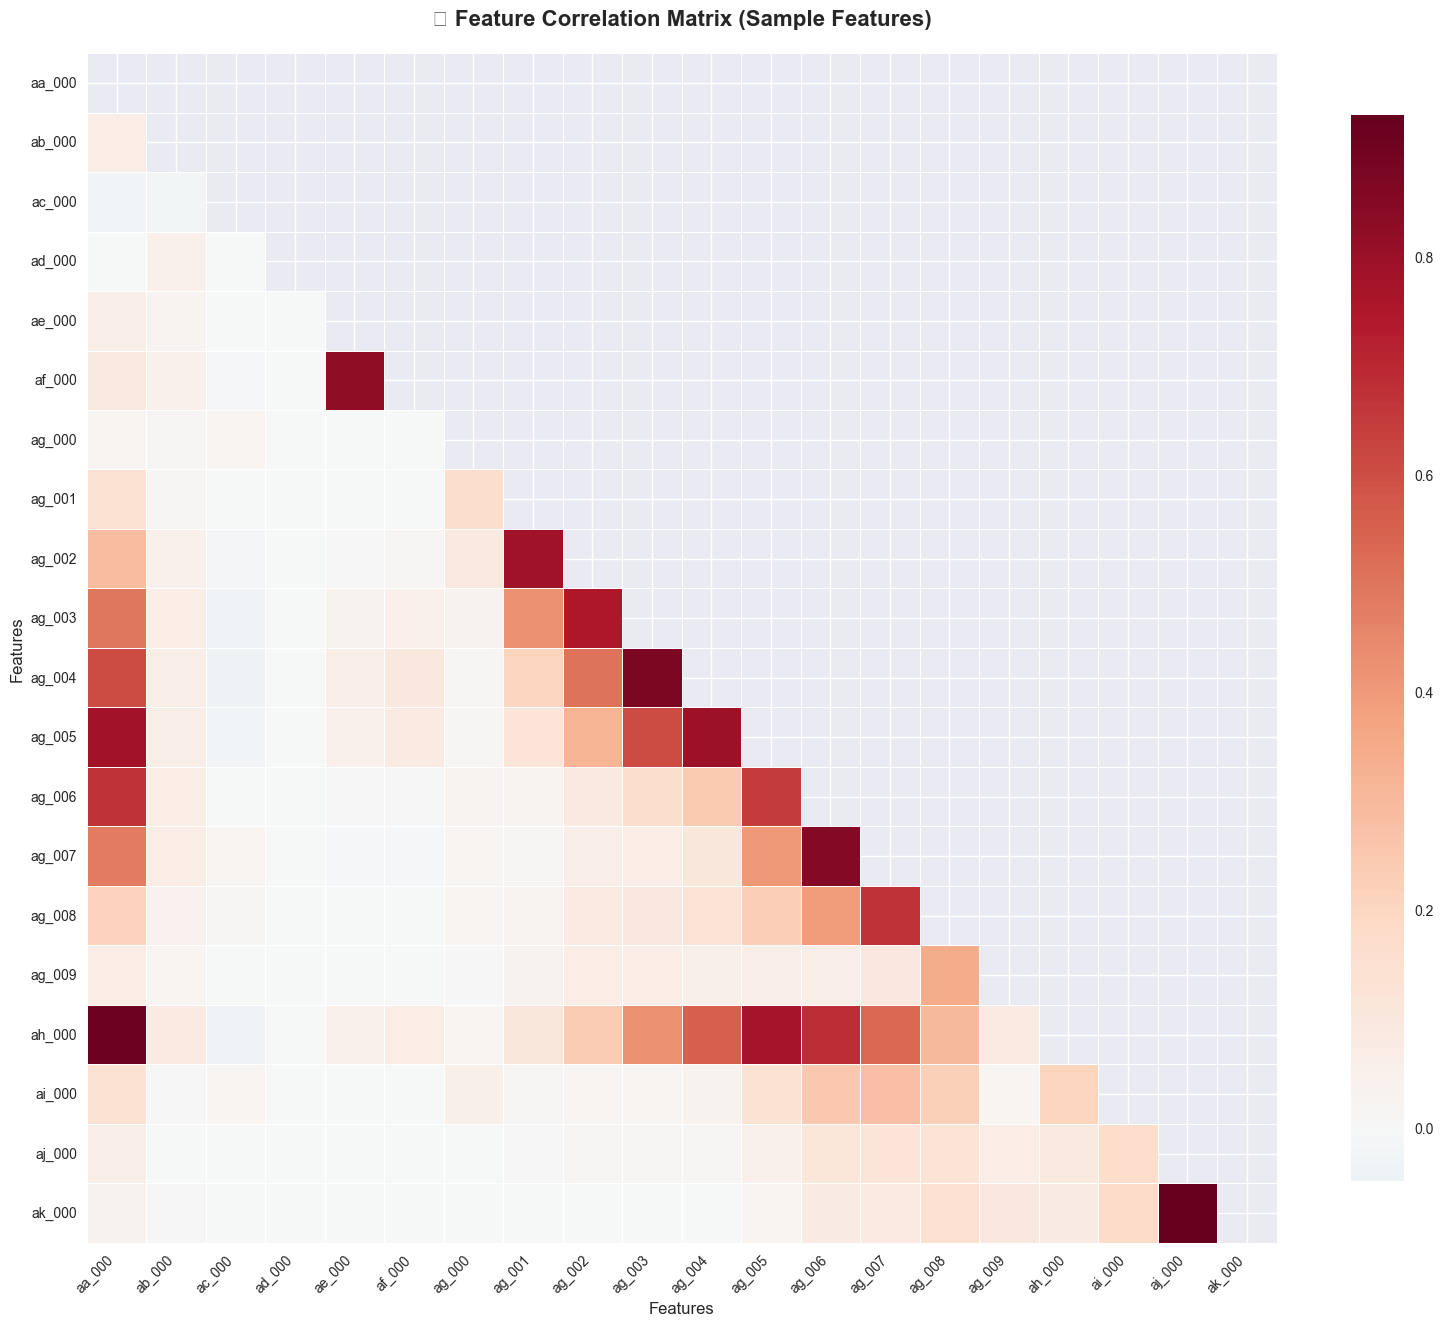

💾 Visualization saved to: artifacts/correlation_matrix.png


In [25]:
# 📊 Visualize Correlation Matrix
plt.figure(figsize=(16, 14))

# Create correlation heatmap
mask = np.triu(np.ones_like(corr_data, dtype=bool))  # Mask upper triangle
heatmap = sns.heatmap(corr_data, mask=mask, annot=False, cmap='RdBu_r', center=0,
                      square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('🔗 Feature Correlation Matrix (Sample Features)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('artifacts/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Visualization saved to: artifacts/correlation_matrix.png")

## 6️⃣ Statistical Summary

Comprehensive statistical analysis of the dataset.

In [26]:
# 📈 Comprehensive Statistical Summary
print("📈 COMPREHENSIVE STATISTICAL SUMMARY")
print("="*50)

# Dataset overview
print(f"📊 Dataset Overview:")
print(f"  • Total samples: {len(data):,}")
print(f"  • Total features: {len(numeric_cols)}")
print(f"  • Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Class distribution summary
print(f"\n🎯 Class Distribution:")
for class_name, count in class_counts.items():
    percentage = class_percentages[class_name]
    print(f"  • {class_name}: {count:,} ({percentage:.2f}%)")
print(f"  • Imbalance ratio: {imbalance_ratio:.1f}:1")

# Missing values summary
total_missing = data.isnull().sum().sum()
missing_percentage_total = (total_missing / (len(data) * len(data.columns))) * 100
print(f"\n🔍 Missing Values:")
print(f"  • Total missing values: {total_missing:,}")
print(f"  • Percentage of dataset: {missing_percentage_total:.2f}%")
print(f"  • Columns with missing values: {len(missing_info_filtered)}")

# Feature statistics
feature_stats_summary = data[numeric_cols].describe()
print(f"\n📊 Feature Statistics Summary:")
print(f"  • Mean of means: {feature_stats_summary.loc['mean'].mean():.2e}")
print(f"  • Mean of std deviations: {feature_stats_summary.loc['std'].mean():.2e}")
print(f"  • Features with zero minimum: {(feature_stats_summary.loc['min'] == 0).sum()}")
print(f"  • Features with high skewness (>2): {len([col for col in numeric_cols if abs(data[col].skew()) > 2])}")

📈 COMPREHENSIVE STATISTICAL SUMMARY
📊 Dataset Overview:
  • Total samples: 60,000
  • Total features: 170
  • Memory usage: 81.25 MB

🎯 Class Distribution:
  • neg: 59,000 (98.33%)
  • pos: 1,000 (1.67%)
  • Imbalance ratio: 59.0:1

🔍 Missing Values:
  • Total missing values: 850,015
  • Percentage of dataset: 8.28%
  • Columns with missing values: 169

📊 Feature Statistics Summary:
  • Mean of means: 2.69e+06
  • Mean of std deviations: 7.58e+06
  • Features with zero minimum: 168
  • Features with high skewness (>2): 160


## 7️⃣ Data Quality Assessment

Final assessment of data quality and recommendations.

In [27]:
# 🔍 Data Quality Assessment
print("🔍 DATA QUALITY ASSESSMENT")
print("="*50)

# Initialize quality score
quality_score = 100
issues = []

# Check class imbalance
if imbalance_ratio > 50:
    quality_score -= 30
    issues.append(f"🚨 Severe class imbalance ({imbalance_ratio:.1f}:1)")
elif imbalance_ratio > 10:
    quality_score -= 20
    issues.append(f"⚠️ High class imbalance ({imbalance_ratio:.1f}:1)")

# Check missing values
if missing_percentage_total > 20:
    quality_score -= 25
    issues.append(f"🚨 High missing values ({missing_percentage_total:.1f}%)")
elif missing_percentage_total > 10:
    quality_score -= 15
    issues.append(f"⚠️ Moderate missing values ({missing_percentage_total:.1f}%)")

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    quality_score -= 10
    issues.append(f"⚠️ Duplicate rows found: {duplicate_rows}")

# Check for constant features
constant_features = []
for col in numeric_cols:
    if data[col].nunique() <= 1:
        constant_features.append(col)

if len(constant_features) > 0:
    quality_score -= 10
    issues.append(f"⚠️ Constant features: {len(constant_features)}")

# Print assessment results
print(f"📊 OVERALL DATA QUALITY SCORE: {quality_score}/100")

if quality_score >= 80:
    print("✅ EXCELLENT data quality")
elif quality_score >= 60:
    print("🟡 GOOD data quality with minor issues")
elif quality_score >= 40:
    print("🟠 FAIR data quality with notable issues")
else:
    print("🔴 POOR data quality requiring significant preprocessing")

print(f"\n🔍 Identified Issues:")
for i, issue in enumerate(issues, 1):
    print(f"  {i}. {issue}")

if not issues:
    print("  ✅ No major data quality issues identified!")

🔍 DATA QUALITY ASSESSMENT
📊 OVERALL DATA QUALITY SCORE: 60/100
🟡 GOOD data quality with minor issues

🔍 Identified Issues:
  1. 🚨 Severe class imbalance (59.0:1)
  2. ⚠️ Constant features: 1


## 📋 EDA Summary & Recommendations

### 🎯 **Key Findings:**

1. **🚨 Severe Class Imbalance**: The dataset has an extreme imbalance ratio of approximately 59:1 (negative:positive)
2. **📊 Large Feature Space**: 170 anonymous features require careful preprocessing
3. **🔍 Missing Values**: Significant missing data patterns that need handling
4. **📈 High Variance Features**: Many features show high variance requiring scaling

### 💡 **Recommendations for Next Steps:**

1. **🎯 Class Imbalance Handling**:
   - Implement SMOTE (Synthetic Minority Oversampling Technique)
   - Use class weights in algorithms
   - Consider ensemble methods
   - Focus on F1-score and AUC metrics instead of accuracy

2. **🔧 Preprocessing Requirements**:
   - Handle missing values (median imputation recommended)
   - Scale features (StandardScaler or MinMaxScaler)
   - Remove or handle constant features
   - Consider feature selection techniques

3. **📊 Model Selection**:
   - Start with algorithms robust to imbalance (Random Forest, XGBoost)
   - Implement proper cross-validation with stratification
   - Use appropriate evaluation metrics for imbalanced data

---

**✅ EDA Complete! Ready for Data Cleaning and Preprocessing.**